Source: https://rstudio-pubs-static.s3.amazonaws.com/45786_b5e54c2d3c824f51abd2d559506cf81f.html

# Research Questions
Question 1: is a car with automatic or manual transmission better in term of miles per gallons (mpg)?

Question 2: quantify the mpg difference between automatic and manual transmission.

## Analysis structure:
I will address both issues from different angles employing a set of methodologies that can be broadly grouped as follows:
Univariate analysis on target variable (mpg).
Bivariate analysis on target variable and relevant covariates.
Multivariate analysis: estimation a set of regression models for the conditional mean of mpg. For model selection, I compare the Best Fit and Forward Stepwise Selection procedures

## Chapter 1. Univariate analysis
In this chapter I focus on analyzing the target variable (mpg) alone by splitting the observations into two groups, i.e. cars wtih automatic or manual transmission. I will execute 3 analysis:
1. Compute sample means by group (i.e. transmission automatic vs. manual).

2. Validate if the difference of the group means is statistically significant by computing a 95% confidence interval for means difference.
    
    3.Verify the robustness of this result by executing a permutation test with Monte Carlo trials that shuffle the allocation group > mpg.

In [1]:
## Sample means by Group
cars_auto = subset(mtcars, am==0)
cars_manual = subset(mtcars, am==1)

In [4]:
##sample mean mpg by group
print(mean(cars_auto$mpg))
print("====================")
print(mean(cars_manual$mpg))

[1] 17.14737
[1] "===================="
[1] 24.39231


In [5]:
##sample sd mpg by group
print(sd(cars_auto$mpg))
print("====================")
print(sd(cars_manual$mpg))

[1] 3.833966
[1] "===================="
[1] 6.166504


In [6]:
## % increase in mpg based on sample mean
(mean(cars_manual$mpg)-mean(cars_auto$mpg))/mean(cars_auto$mpg)

[1] 0.4225103

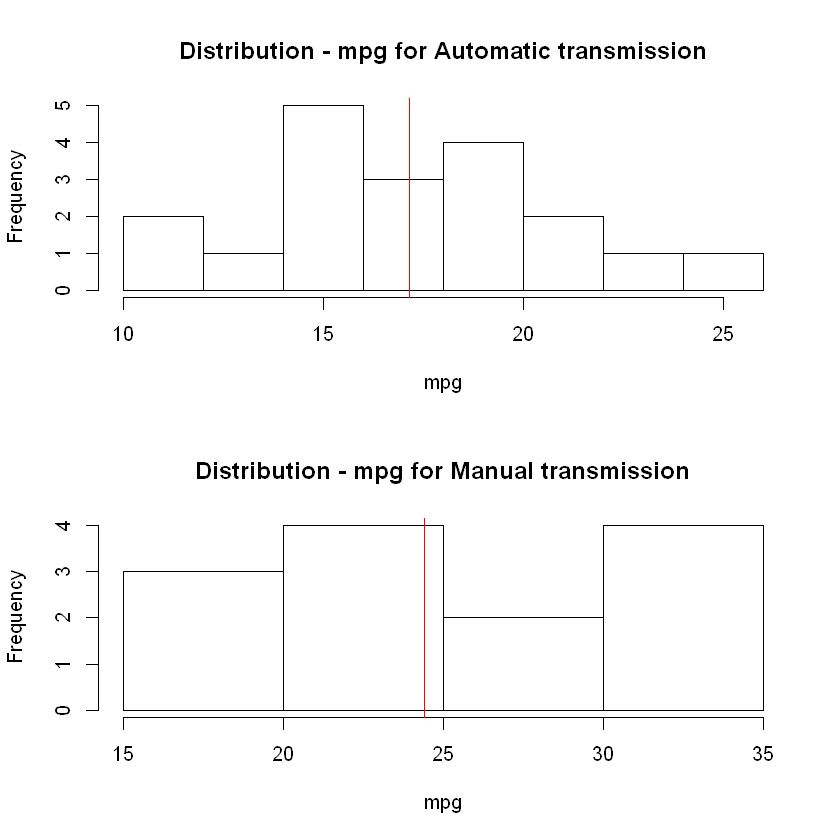

In [7]:
## mpg plots
par(mfrow=c(2,1))
hist(cars_auto$mpg, main="Distribution - mpg for Automatic transmission", xlab="mpg")
abline(v=mean(cars_auto$mpg), col="red")
hist(cars_manual$mpg, main="Distribution - mpg for Manual transmission", xlab="mpg")
abline(v=mean(cars_manual$mpg), col="red")

## Conclusions:

mpg empirical mean of cars with manual transmission is greater than cars with automatic transmission, however has also higher variance.

Based on this result alone can be concluded that on average cars with manual transmission have 42% mileage than cars with automatic transmission. >>> is correct to conclude this?

# 95% confidence interval for the difference of the group means

The analysis on sample means concludes that sample mean of mpg for car with manual trasmission is greater than automatic:

Now I test if this difference (i.e. in the sample means) is statistically significant (from zero).

I execute a t.test for unpaired samples: I assume inequality in variances for the two groups for the calculation of the pooled variance.

In [10]:
## question: Is the sample mean difference significant?
t.test(cars_manual$mpg, cars_auto$mpg, paired=F, var.equal=F)


	Welch Two Sample t-test

data:  cars_manual$mpg and cars_auto$mpg
t = 3.7671, df = 18.332, p-value = 0.001374
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  3.209684 11.280194
sample estimates:
mean of x mean of y 
 24.39231  17.14737 


Conclusions:

The 95% interval does not contain 0

The sample mean difference is significant at 95% (p-value 0.001%).